In [1]:
import os
import cv2
import random
import numpy as np
from matplotlib import pyplot as plt

In [2]:
base_dir = 'Fruit-Images-Dataset/'
CATEGORIES = ["Apple Red 1","Apricot","Avocado","Banana", "Cherry 1", "Fig","Kiwi", "Grape Blue", "Lemon", "Tomato 3", "Strawberry", "Watermelon"]
CLASS_NAMES = CATEGORIES
train_images = []
train_dir = os.path.join(base_dir, 'Training/')		     
for category in CATEGORIES:
    path = os.path.join(train_dir, category)
    class_num = CATEGORIES.index(category)
    for image in os.listdir(path):					         
        if(image.endswith('jpg') and not image.startswith('.')):
            img_array = cv2.imread(os.path.join(path,image), cv2.COLOR_BGR2RGB)
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            train_images.append([img_array, class_num])

print("Training images: ", len(train_images))

Training images:  6742


In [4]:
test_images = []
test_dir = os.path.join(base_dir, 'Test/')		        
for category in CATEGORIES:	    
    path = os.path.join(test_dir, category)
    class_num = CATEGORIES.index(category)
    for image in os.listdir(path):						          
        if(image.endswith('jpg') and not image.startswith('.')):
            img_array = cv2.imread(os.path.join(path,image), cv2.COLOR_BGR2RGB)
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            test_images.append([img_array, class_num])	

print("Training images: ", len(test_images))

Training images:  2250


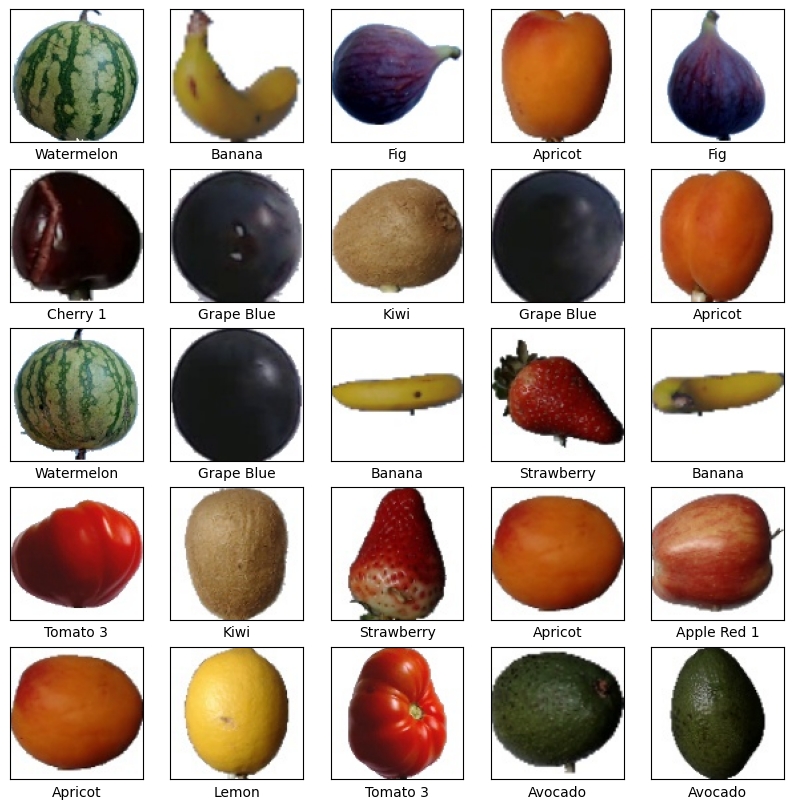

In [5]:
img_idx = random.sample(range(len(train_images)), 25)
img_idx = np.array(img_idx)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([]);plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[img_idx[i]][0])
    plt.xlabel(CLASS_NAMES[train_images[img_idx[i]][1]])
plt.show()

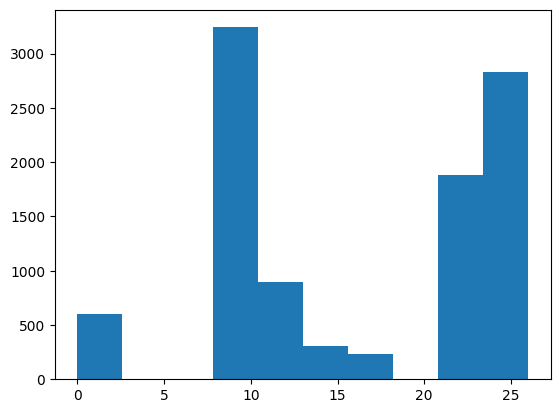

In [7]:
def hist(matrix):
    NewImg = np.ones_like(matrix)
    NewImg = np.where(matrix<85, 0, NewImg)
    NewImg = np.where((85<=matrix) & (171>matrix), 1, NewImg)
    NewImg = np.where((171<=matrix) & (255>=matrix), 2, NewImg)
    C = (9 * NewImg[:, :, 0] + 3 * NewImg[:, :, 1] +NewImg[:, :, 2]).astype(np.uint8)
    return C.reshape(10000)
res = hist(train_images[0][0])
plt.hist(res)
plt.show()

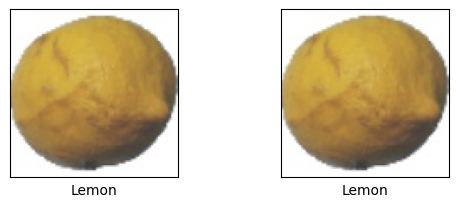

In [ ]:
def getSpace(home, neighbor):
    space = np.abs(np.subtract(home, neighbor))
    return sum(space)

def getNN(home, neighbors):
    spaces = [getSpace(home, hist(image[0])) for image in neighbors]
    indexClass = np.argmin(spaces)
    return train_images[indexClass][0], train_images[indexClass][1]


result = getNN(hist(train_images[5000][0]), train_images)
plt.subplot(222);plt.imshow(train_images[5000][0]);plt.xlabel(CLASS_NAMES[train_images[5000][1]])
plt.xticks([]);plt.yticks([])
plt.subplot(221);plt.imshow(result[0]);plt.xlabel(CLASS_NAMES[result[1]])
plt.xticks([]);plt.yticks([])
plt.grid(False)
plt.show()
